# Import Necessary Libraries

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data and Inspect

In [25]:
file_path = r'C:\Users\saman\Desktop\Work\Uptrail Internship\Project 2\Project Files\Project Files\raw_sales_data.csv'

In [26]:
raw_sales_data = pd.read_csv(file_path, sep = ',')
raw_sales_data

,Order_ID,Customer_Name,Email,Phone,Product_Category,Order_Date,Revenue,Discount (%)
0,101,John Doe,john@email.com,9.876543e+09,Electronics,12/31/2023,1200,10.0
1,102,Alice Smith,NaN,9.898990e+09,Clothing,01-05-24,500,NaN
2,103,Bob Miller,bob@email.com,NaN,Electronics,12-01-24,3000,20.0
3,104,John Doe,john@email.com,9.876543e+09,Electronics,12/31/2023,1200,10.0
4,105,David White,david@email.com,9.123457e+09,Furniture,02-15-2024,2500,15.0
5,106,Emma Brown,emma@email.com,9.234568e+09,Clothing,08-03-24,700,5.0
6,107,Chris Green,NaN,9.345679e+09,Furniture,04-10-24,1800,25.0
7,108,Alice Smith,alice@email.com,NaN,Clothing,03-08-24,500,NaN


In [27]:
raw_sales_data.columns

Index(['Order_ID', 'Customer_Name', 'Email', 'Phone', 'Product_Category',
       'Order_Date', 'Revenue', 'Discount (%)'],
      dtype='object')

In [28]:
raw_sales_data.shape

(8, 8)

In [29]:
raw_sales_data.info

<bound method DataFrame.info of    Order_ID Customer_Name            Email         Phone Product_Category  \
0       101      John Doe   john@email.com  9.876543e+09      Electronics   
1       102   Alice Smith              NaN  9.898990e+09         Clothing   
2       103    Bob Miller    bob@email.com           NaN      Electronics   
3       104      John Doe   john@email.com  9.876543e+09      Electronics   
4       105   David White  david@email.com  9.123457e+09        Furniture   
5       106    Emma Brown   emma@email.com  9.234568e+09         Clothing   
6       107   Chris Green              NaN  9.345679e+09        Furniture   
7       108   Alice Smith  alice@email.com           NaN         Clothing   

   Order_Date  Revenue  Discount (%)  
0  12/31/2023     1200          10.0  
1    01-05-24      500           NaN  
2    12-01-24     3000          20.0  
3  12/31/2023     1200          10.0  
4  02-15-2024     2500          15.0  
5    08-03-24      700           5.0  
6

In [30]:
raw_sales_data.dtypes

Order_ID              int64
Customer_Name        object
Email                object
Phone               float64
Product_Category     object
Order_Date           object
Revenue               int64
Discount (%)        float64
dtype: object

In [31]:
raw_sales_data.isnull().sum()

Order_ID            0
Customer_Name       0
Email               2
Phone               2
Product_Category    0
Order_Date          0
Revenue             0
Discount (%)        2
dtype: int64

In [32]:
raw_sales_data.duplicated().sum()

np.int64(0)

# Data Cleaning

In [33]:
raw_sales_data['Email'] = raw_sales_data['Email'].fillna('Unknown')

In [34]:
raw_sales_data['Phone'] = raw_sales_data['Phone'].fillna('Unknown')

In [35]:
raw_sales_data['Discount (%)'] = raw_sales_data['Discount (%)'].fillna(0)

In [36]:
raw_sales_data

,Order_ID,Customer_Name,Email,Phone,Product_Category,Order_Date,Revenue,Discount (%)
0,101,John Doe,john@email.com,9876543210.0,Electronics,12/31/2023,1200,10.0
1,102,Alice Smith,Unknown,9898989898.0,Clothing,01-05-24,500,0.0
2,103,Bob Miller,bob@email.com,Unknown,Electronics,12-01-24,3000,20.0
3,104,John Doe,john@email.com,9876543210.0,Electronics,12/31/2023,1200,10.0
4,105,David White,david@email.com,9123456789.0,Furniture,02-15-2024,2500,15.0
5,106,Emma Brown,emma@email.com,9234567890.0,Clothing,08-03-24,700,5.0
6,107,Chris Green,Unknown,9345678901.0,Furniture,04-10-24,1800,25.0
7,108,Alice Smith,alice@email.com,Unknown,Clothing,03-08-24,500,0.0


In [37]:
dup_customer_name = raw_sales_data['Customer_Name'].duplicated().sum()
dup_customer_name

np.int64(2)

In [38]:
sales_data_cleaned = raw_sales_data.drop_duplicates(subset='Customer_Name', keep='first')
sales_data_cleaned

,Order_ID,Customer_Name,Email,Phone,Product_Category,Order_Date,Revenue,Discount (%)
0,101,John Doe,john@email.com,9876543210.0,Electronics,12/31/2023,1200,10.0
1,102,Alice Smith,Unknown,9898989898.0,Clothing,01-05-24,500,0.0
2,103,Bob Miller,bob@email.com,Unknown,Electronics,12-01-24,3000,20.0
4,105,David White,david@email.com,9123456789.0,Furniture,02-15-2024,2500,15.0
5,106,Emma Brown,emma@email.com,9234567890.0,Clothing,08-03-24,700,5.0
6,107,Chris Green,Unknown,9345678901.0,Furniture,04-10-24,1800,25.0


In [39]:
sales_data_cleaned.loc[:, 'Order_Date'] = pd.to_datetime(sales_data_cleaned['Order_Date'], format = 'mixed')

In [40]:
sales_data_cleaned

,Order_ID,Customer_Name,Email,Phone,Product_Category,Order_Date,Revenue,Discount (%)
0,101,John Doe,john@email.com,9876543210.0,Electronics,2023-12-31 00:00:00,1200,10.0
1,102,Alice Smith,Unknown,9898989898.0,Clothing,2024-01-05 00:00:00,500,0.0
2,103,Bob Miller,bob@email.com,Unknown,Electronics,2024-12-01 00:00:00,3000,20.0
4,105,David White,david@email.com,9123456789.0,Furniture,2024-02-15 00:00:00,2500,15.0
5,106,Emma Brown,emma@email.com,9234567890.0,Clothing,2024-08-03 00:00:00,700,5.0
6,107,Chris Green,Unknown,9345678901.0,Furniture,2024-04-10 00:00:00,1800,25.0


Save cleaned file as csv

In [41]:
sales_data_cleaned.to_csv("sales_data_cleaned.csv", index=False)

# Visualization

In [42]:
sns.set(style="whitegrid")

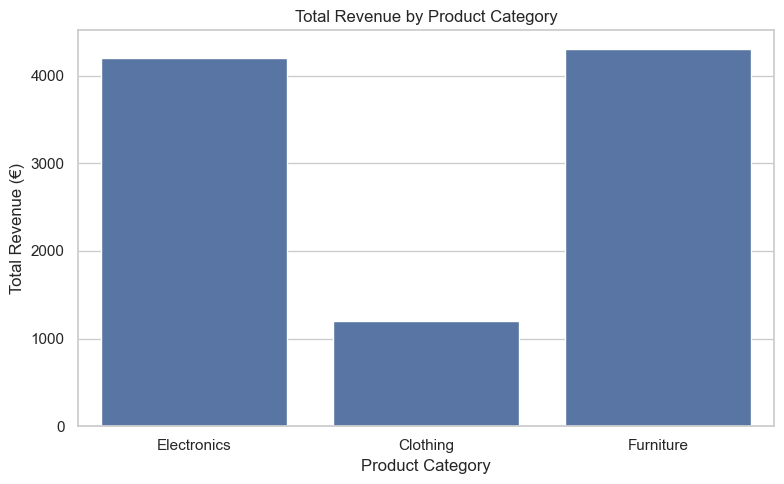

In [44]:
# Plot 1: Revenue by Product Category
plt.figure(figsize=(8, 5))
sns.barplot(x="Product_Category", y="Revenue", data=sales_data_cleaned, estimator=sum, errorbar=None)
plt.title("Total Revenue by Product Category")
plt.ylabel("Total Revenue (€)")
plt.xlabel("Product Category")
plt.tight_layout()
plt.show()

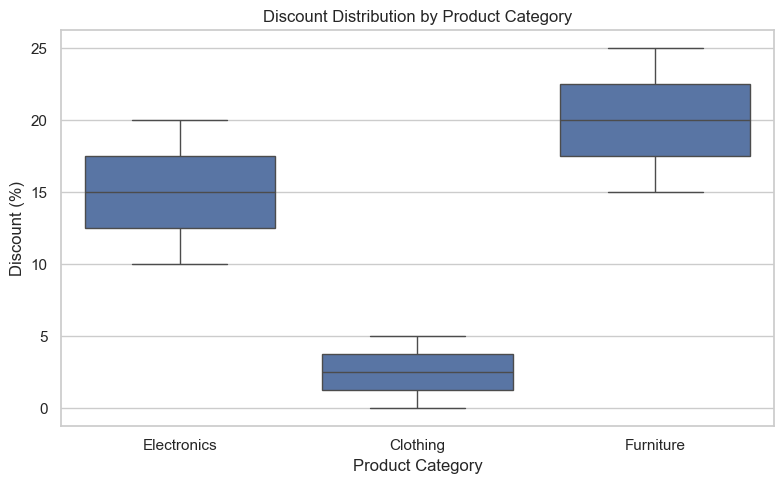

In [45]:
# Plot 2: Discount by Product Category
plt.figure(figsize=(8, 5))
sns.boxplot(x="Product_Category", y="Discount (%)", data=sales_data_cleaned)
plt.title("Discount Distribution by Product Category")
plt.ylabel("Discount (%)")
plt.xlabel("Product Category")
plt.tight_layout()
plt.show()

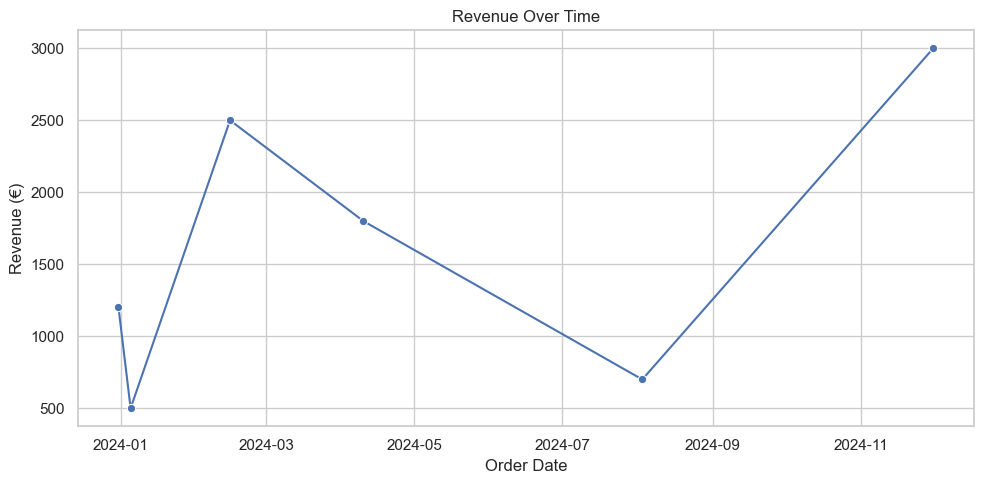

In [46]:
# Plot 3: Revenue over Time
plt.figure(figsize=(10, 5))
sns.lineplot(x="Order_Date", y="Revenue", data=sales_data_cleaned, marker='o')
plt.title("Revenue Over Time")
plt.ylabel("Revenue (€)")
plt.xlabel("Order Date")
plt.tight_layout()
plt.show()